In [1]:
import numpy as np
import qze.dimer_gutz as dimer_gutz
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# No-click dynamics

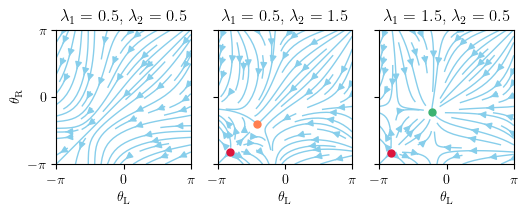

In [2]:
lambdas = [[.5, .5], [.5, 1.5], [1.5, .5]]
Nth = 1001

thetas = np.linspace(-np.pi, np.pi, Nth)

plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x3.mplstyle"])

ticks = np.linspace(-np.pi, np.pi, 3)
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

fig, axs = plt.subplots(1, 3)
for i, (lmbd_1, lmbd_2) in enumerate(lambdas):
    flow = dimer_gutz.thetas_flow(thetas, thetas, lmbd_1, lmbd_2)

    
    axs[i].streamplot(thetas, thetas, flow, flow.T,
                      density=.75,
                      color="skyblue")

    axs[i].set_xticks(ticks)
    axs[i].set_xticklabels(tick_labels)
    axs[i].set_yticks(ticks)
    axs[i].set_yticklabels(tick_labels)
    axs[i].set_title(rf"$\lambda_1 = {lmbd_1}$, $\lambda_2 = {lmbd_2}$")
    axs[i].set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
    axs[i].set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
    axs[i].set(aspect='equal')


# Compute and draw stationary pts for phese II
(lmbd_1, lmbd_2) = lambdas[1]

f = dimer_gutz.flow_potential_diag
args = (lmbd_1, lmbd_2)
th_min = minimize_scalar(f,
                         bounds=(-np.pi, np.pi),
                         args=args).x
th_lmax = minimize_scalar(lambda t, lmbd_1, lmbd_2 : -f(t, lmbd_1, lmbd_2),
                          bounds=(-np.pi, th_min),
                          args=args).x
axs[1].plot(th_min, th_min,
            "o",
            markersize=5,
            color="coral")
axs[1].plot(th_lmax, th_lmax,
            "o",
            markersize=5,
            color="crimson")


# Compute and draw stationary pts for phese III
(lmbd_1, lmbd_2) = lambdas[2]

f = dimer_gutz.flow_potential_diag
args = (lmbd_1, lmbd_2)
th_min = minimize_scalar(f,
                         bounds=(-np.pi, np.pi),
                         args=args).x
th_lmax = minimize_scalar(lambda t, lmbd_1, lmbd_2 : -f(t, lmbd_1, lmbd_2),
                          bounds=(-np.pi, th_min),
                          args=args).x
axs[2].plot(th_min, th_min,
            "o",
            markersize=5,
            color="mediumseagreen")
axs[2].plot(th_lmax, th_lmax,
            "o",
            markersize=5,
            color="crimson")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig("plots/dimer/dimer-gutz-no-click-flow.pdf")

# Stability of fixed points

In [3]:
epsilon = 10**-4

lmbd_1_list = np.linspace(0, 3, 2101)
lmbd_2_list = np.linspace(0, 3, 2101)

phase_diag = np.empty( (len(lmbd_2_list), len(lmbd_1_list)) )

for i, lmbd_2 in enumerate(lmbd_2_list):
    for j, lmbd_1 in enumerate(lmbd_1_list):
        # Miminize phi_diag
        args = (lmbd_1, lmbd_2)
        t_min= minimize_scalar(dimer_gutz.flow_potential_diag,
                                        bounds=(-np.pi, np.pi),
                                        args=args).x
        if t_min < -np.pi + epsilon:
            # phase_diag[i, j] = 0
            phase_diag[i, j] = 1
        else:
            H = dimer_gutz.flow_potential_hessian(t_min, t_min, lmbd_1, lmbd_2)
            eigva = np.linalg.eigh(H)[0]
            # print(eigva)
            if all(eigva > 0):
                phase_diag[i, j] = 2
            else:
                phase_diag[i, j] = 1

KeyboardInterrupt: 

In [ ]:
f = open("data/dimer-stages-I-II-analytical.dat", "r")
dat = np.loadtxt(f)
f.close()

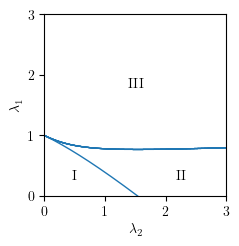

In [ ]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])

plt.xlabel(r"$\lambda_2$")
plt.ylabel(r"$\lambda_1$")
plt.contour(lmbd_2_list, lmbd_1_list, phase_diag.T,
            colors="tab:blue",
            linewidths=.85)

plt.plot(dat[:,1][1:], dat[:,0][1:],
         lw=1,
         color="tab:blue")

plt.gca().set_aspect('equal')

plt.text(.5,.33, "I",
         ha="center", va="center")
plt.text(2.25,.33, "II",
         ha="center", va="center")
plt.text(1.5, 1.85, "III",
         ha="center", va="center")

plt.yticks([0, 1, 2, 3])

plt.savefig("plots/dimer/dimer-gutz-stages-diagram.pdf", bbox_inches="tight")